### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import inv

from sklearn.preprocessing import StandardScaler


In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

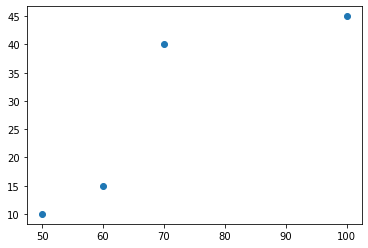

In [3]:
plt.scatter(x_hw, y_hw)
plt.show()

In [4]:
X = np.array(list([1, x] for x in x_hw))
X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [5]:
Y = np.array(y_hw).reshape(-1, 1)
Y

array([[10],
       [15],
       [40],
       [45]])

$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$

In [6]:
w = inv((X.T).dot(X))\
    .dot(X.T)\
    .dot(Y)
w

array([[-22.5       ],
       [  0.71428571]])

In [7]:
print('{:.5f} {:.3f}'.format(w[0][0], w[1][0]))

-22.50000 0.714


In [8]:
def y_pred(x):
    return w[0][0] + w[1][0] * x

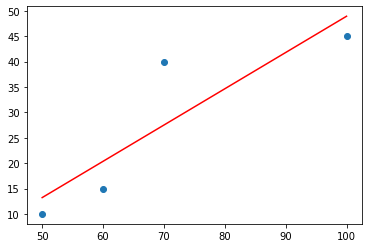

In [9]:
plt.scatter(x_hw, y_hw)
plt.plot([min(x_hw), max(x_hw)], [y_pred(min(x_hw)), y_pred(max(x_hw))], c='r')
plt.show()

### Урок 7. Домашняя работа

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [10]:

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

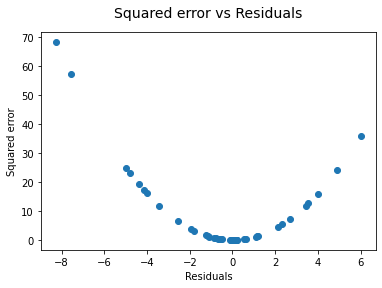

In [11]:

%matplotlib inline

# -- ВАШ КОД ТУТ --

residuals = (y_pred_ - y_true_)
squared_err = residuals ** 2

plt.scatter(residuals, squared_err)
plt.title("Squared error vs Residuals", pad=15.0, fontsize=14)
plt.xlabel("Residuals")
plt.ylabel("Squared error")
plt.show()

### Урок 9. Домашняя работа

Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

In [12]:

x = np.linspace(1,10,num=10)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)


In [13]:
scaler = StandardScaler()
y_transformed = scaler.fit_transform(y.reshape(-1, 1))
y_transformed

array([[-1.2465616 ],
       [-0.57274455],
       [-0.23583598],
       [-0.9096531 ],
       [ 1.7856153 ],
       [ 0.10107257],
       [ 0.10107257],
       [-0.9096531 ],
       [ 0.10107257],
       [ 1.7856153 ]], dtype=float32)

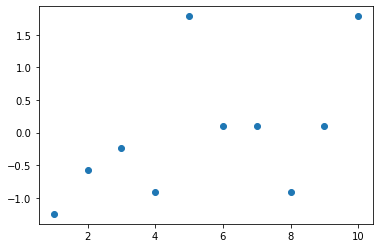

In [14]:
plt.scatter(x, y_transformed)
plt.show()

### Урок 11. Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [15]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [16]:
data = pd.read_csv("3.10_non_linear.csv")
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


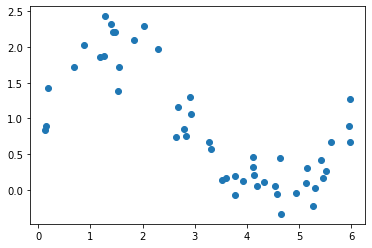

In [17]:
plt.scatter(data.x_train, data.y_train)
plt.show()

In [18]:
def degrees_generator(source_data, degree):
    return np.array([
        source_data ** n for n in range(1, degree + 1)
    ]).T

In [19]:
def train_polynomial(source_data, target_data, degree):
    X = degrees_generator(source_data, degree)
    model = LinearRegression().fit(X, target_data)
    y_pred = model.predict(X)
    r_2_score = r2_score(target_data, y_pred)
    return y_pred, r_2_score

In [20]:
def best_r2(source_data, target_data, degree):
    r_squares = {deg: train_polynomial(source_data, target_data, deg)[1] for deg in range(1, degree + 1)}
    max_score = max(r_squares.items(), key=lambda x: x[1])
    return max_score, r_squares

In [21]:
# При степени полинома 30 график хорошо иллюстрирует снижение величины r2-score при увеличении степени
# Степень полинома 10 как в задании даст r2-score немного ниже максимального, а именно 0.909

degree = 30
best_scores = best_r2(data.x_train, data.y_train, degree)
best_degree = best_scores[0][0]
print("Лучший r2-score равный {:.5f} даёт полином {} степени".format(best_scores[0][1], best_scores[0][0]))
print("Степень полинома 10 как в задании даст r2-score равный {:.5f}".format(best_scores[1][10]))

Лучший r2-score равный 0.91639 даёт полином 14 степени
Степень полинома 10 как в задании даст r2-score равный 0.90911


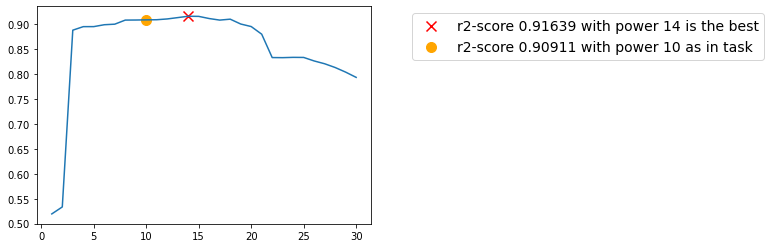

In [22]:
plt.plot(best_scores[1].keys(), best_scores[1].values())
plt.scatter(best_scores[0][0], best_scores[0][1], 100, marker='x', c='r', label=f'r2-score {best_scores[0][1]:.5f} with power {best_scores[0][0]} is the best')
plt.scatter(10, best_scores[1][10], 100, marker='o', c='orange', label=f'r2-score {best_scores[1][10]:.5f} with power 10 as in task')
plt.legend(loc=0, bbox_to_anchor=(1.1, 1), fontsize=14)
plt.show()

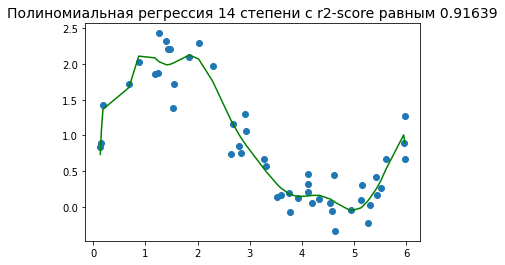

In [23]:
y_best, _ = train_polynomial(data.x_train, data.y_train, best_degree)

plt.scatter(data.x_train, data.y_train)
plt.plot(data.x_train, y_best, c='g')
plt.title("Полиномиальная регрессия {} степени с r2-score равным {:.5f}"\
          .format(best_scores[0][0], best_scores[0][1]),
         fontsize=14)
plt.show()

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов. 

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [24]:
class CustomLinearReg:
    intercept_, slope_ = 0, 0
    
    def __init__(self):
        from numpy.linalg import inv
    
    def fit(self, X, y):
        X = np.array(list([1, x] for x in X))
        y = np.array(y).reshape(-1, 1)
        w = inv((X.T).dot(X))\
            .dot(X.T)\
            .dot(y)
        self.intercept_, self.slope_ = w[0][0], w[1][0]
    
    def predict(self, X):
        return self.intercept_ + self.slope_ * np.array(X)

In [25]:
my_reg = CustomLinearReg()
my_reg.fit(x_hw, y_hw)

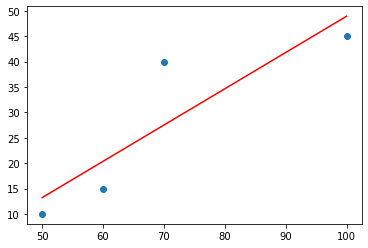

In [26]:
plt.scatter(x_hw, y_hw)
plt.plot(x_hw, my_reg.predict(x_hw), 'r')
plt.show()

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

X, y = load_boston(return_X_y=True)

In [28]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [29]:
simple_model = LinearRegression()
simple_model.fit(x_train, y_train)
y_prediction_1 = simple_model.predict(x_valid)
r2_score_1 = r2_score(y_valid, y_prediction_1)
r2_score_1

0.7548262855078388

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [31]:
y_train_transformed = scaler.fit_transform(y_train.reshape(-1, 1)).reshape(-1)
y_valid_transformed = scaler.fit_transform(y_valid.reshape(-1, 1)).reshape(-1)
x_train_transformed = scaler.fit_transform(x_train)
x_valid_transformed = scaler.fit_transform(x_valid)

In [32]:
z_model = LinearRegression()
z_model.fit(x_train_transformed, y_train_transformed)
y_prediction_z = z_model.predict(x_valid_transformed)
r2_score_z = r2_score(y_valid_transformed, y_prediction_z)
r2_score_z

0.742374876485514

При повторном выполнении ячеек метрика r2 иногда увеличивается, но не сильно, иногда становится меньше